###Import Libraries

In [88]:
import pandas
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm


###Dataset


In [89]:
data = pandas.read_csv('clean_data.csv')

In [90]:
data.describe()

,Rank,Production_Budget(usd),Worldwide_Gross(usd),Domestic_Gross(usd)
count,4879.000000,4.879000e+03,4.879000e+03,4.879000e+03
mean,2542.442509,3.355346e+07,9.788857e+07,4.556276e+07
std,1514.266274,4.154167e+07,1.746036e+08,6.797272e+07
min,1.000000,1.100000e+03,4.010000e+02,3.880000e+02
25%,1230.000000,6.500000e+06,8.036698e+06,4.291514e+06
50%,2490.000000,2.000000e+07,3.455742e+07,2.180030e+07
75%,3813.500000,4.475000e+07,1.076746e+08,5.742777e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [91]:
X = DataFrame(data, columns=['Production_Budget(usd)'])
y = DataFrame(data, columns=['Worldwide_Gross(usd)'])

###Data Visualisations

### Bar plot: Top 10 Movies by Worldwide Gross

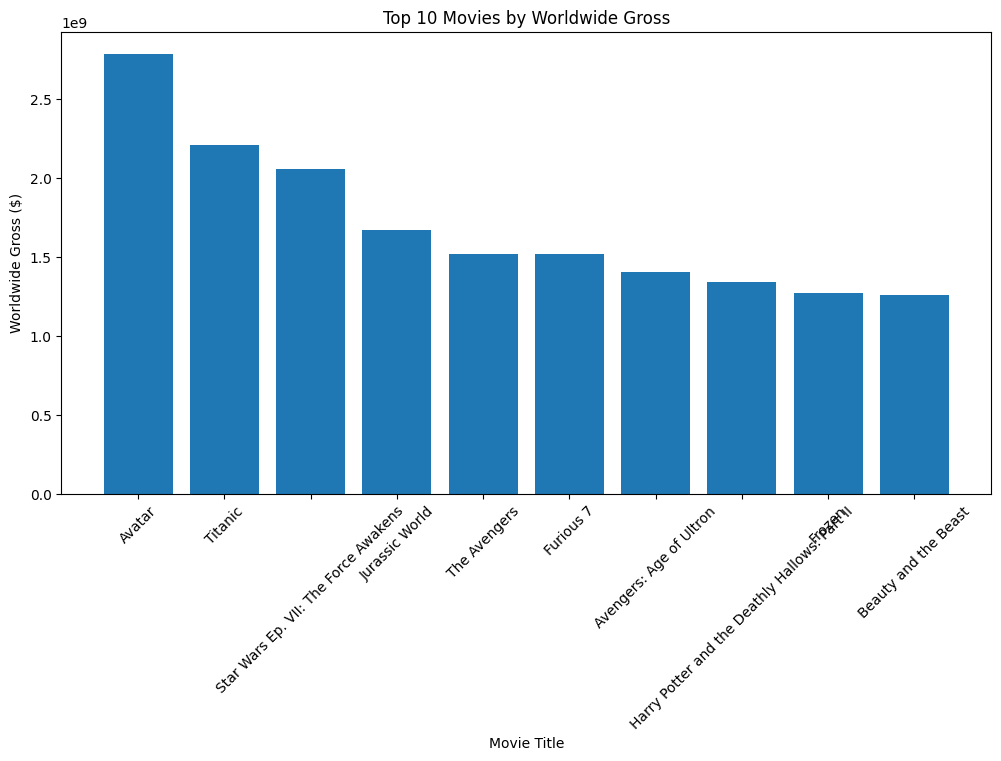

In [92]:

top_10_movies = data.nlargest(10, 'Worldwide_Gross(usd)')

plt.figure(figsize=(12, 6))
plt.bar(top_10_movies['Movie_Title'], top_10_movies['Worldwide_Gross(usd)'])
plt.title('Top 10 Movies by Worldwide Gross')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.show()

### Line plot: Revenue Over Time

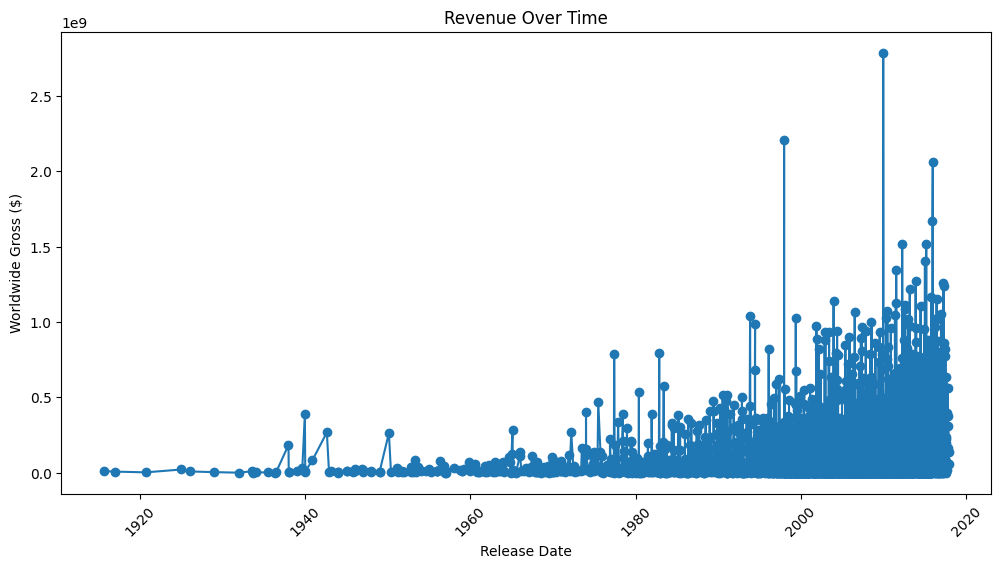

In [93]:

data['Release_Date'] = pandas.to_datetime(data['Release_Date'])
data_sorted = data.sort_values('Release_Date')

plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Release_Date'], data_sorted['Worldwide_Gross(usd)'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.show()


###Scatterplot: Film Cost vs Global Revenue

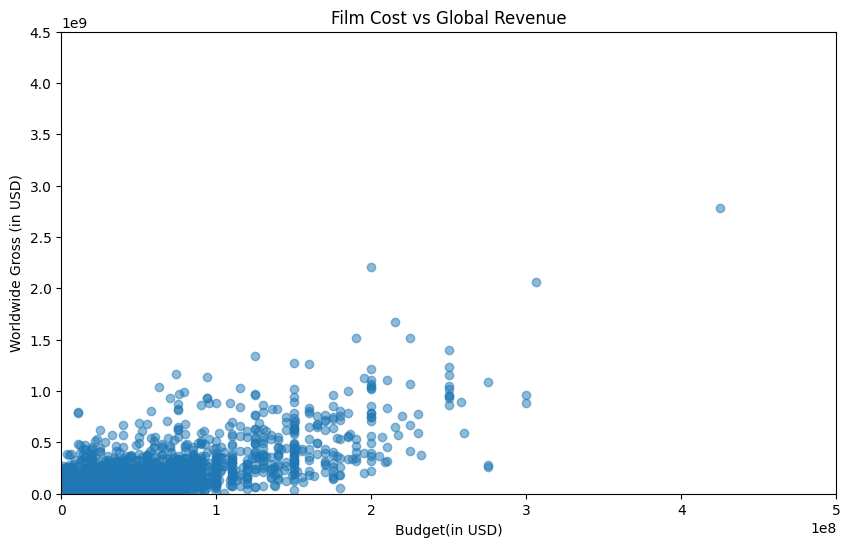

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Budget(in USD)')
plt.ylabel('Worldwide Gross (in USD)')
plt.ylim(0, 4500000000)
plt.xlim(0, 500000000)
plt.show()

#### Heatmap: Correlation Matrix

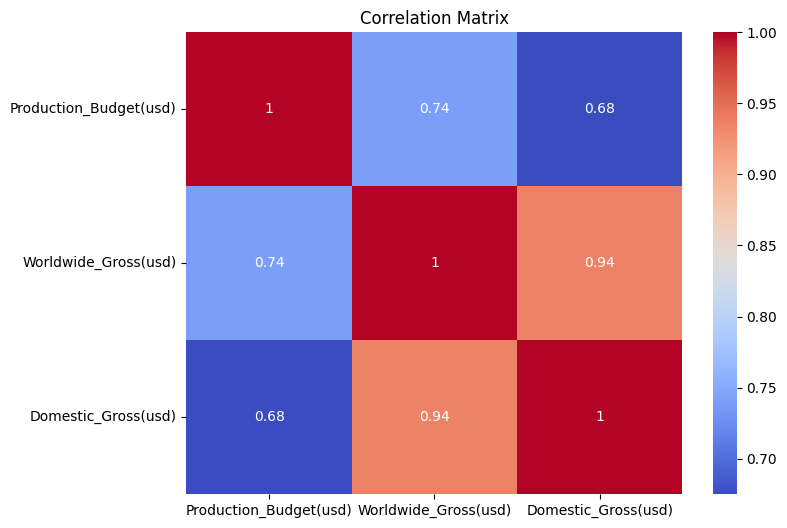

In [95]:

correlation_matrix = data[['Production_Budget(usd)', 'Worldwide_Gross(usd)', 'Domestic_Gross(usd)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot: Production Budget vs International Gross

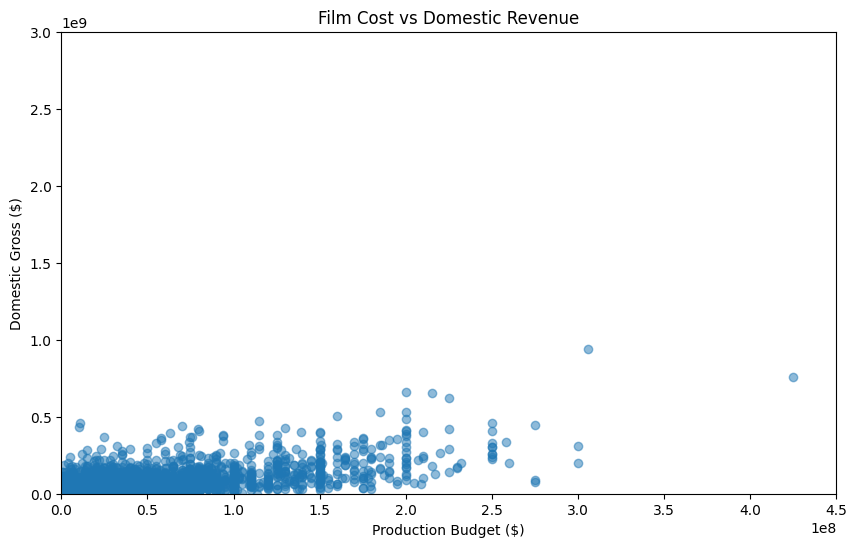

In [96]:

plt.figure(figsize=(10,6))
plt.scatter(data['Production_Budget(usd)'], data['Domestic_Gross(usd)'], alpha=0.5)
plt.title('Film Cost vs Domestic Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()


###Linear Regression

In [97]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
regression.coef_    #slope

array([[3.11158929]])

In [100]:
#intercept
regression.intercept_

array([-6516010.52875772])

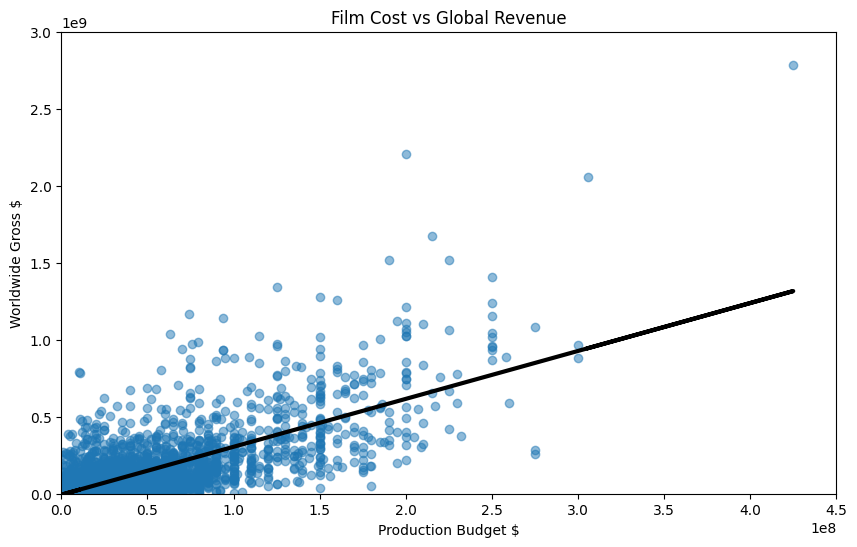

In [101]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5)


plt.plot(X, regression.predict(X), color='black', linewidth=3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [102]:
#regression score
regression.score(X, y)

0.5480572766399463

###Accuracy Measures

In [103]:

y_pred = regression.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
print("r2 score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

r2 score: 0.5480572766399463
Mean Absolute Error: 63591114.52182109
Mean Squared Error: 1.377529464817386e+16
Root Mean Squared Error: 117368201.1797653


###residual plot

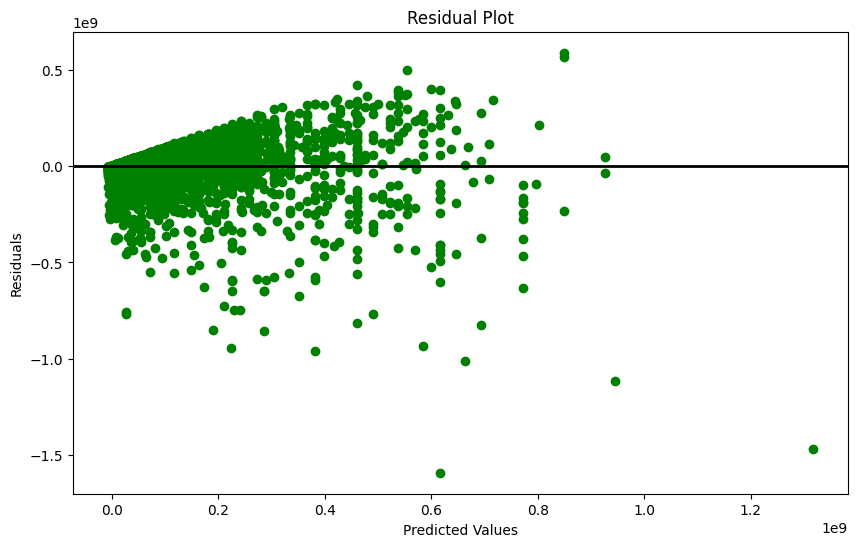

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(regression.predict(X), regression.predict(X) - y, color='green')
plt.axhline(y=0, color='black', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Residuals vs. Fitted Values Plot

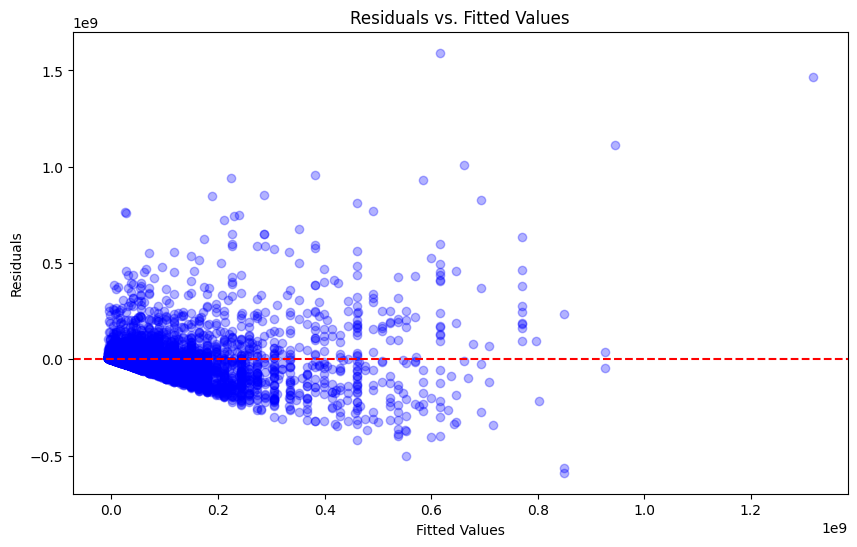

In [105]:
y_pred = regression.predict(X)
residuals = y - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

###Influence Plot

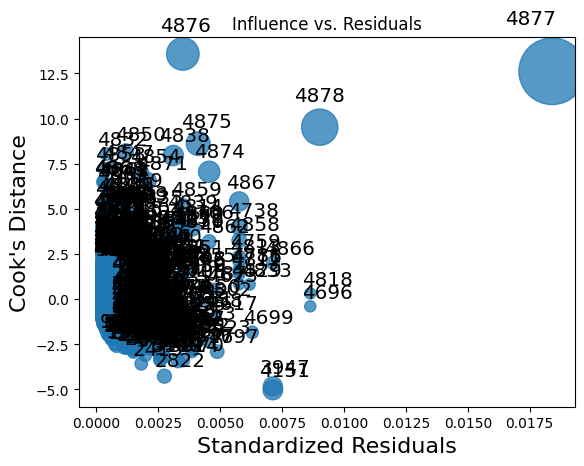

In [106]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
influence = results.get_influence()
influence_plot = influence.plot_influence()
plt.title('Influence vs. Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel("Cook's Distance")
plt.show()